In [ ]:
import pandas as pd
import numpy as np

In [ ]:
enlace = '/content/drive/MyDrive/ENFASIS II/Trabajo Final/heart-disease-dataset.csv'
dtype={1:'string',2:'string',5:'string',6:'string',8:'string',10:'string',11:'string',12:'string'}
df = pd.read_csv(enlace, dtype=dtype, sep = ',', header = None, na_values='?')
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,28,1,2,130.0,132.0,0,2,185.0,0,0.0,<NA>,<NA>,0
1,29,1,2,120.0,243.0,0,0,160.0,0,0.0,<NA>,<NA>,0
2,29,1,2,140.0,NaN,0,0,170.0,0,0.0,<NA>,<NA>,0
3,30,0,1,170.0,237.0,0,1,170.0,0,0.0,<NA>,6,0
4,31,0,2,100.0,219.0,0,1,150.0,0,0.0,<NA>,<NA>,0


In [ ]:
#Asiganamos los nombres a las columnas
cols = ['edad', 'sexo', 'DP', 'PA', 'COL', 'AZ', 'ECG', 'MAXFC', 'EJANG', 'ST', 'Pendiente', 'HR', 'DIAG']
df.columns = cols
df.head()

,edad,sexo,DP,PA,COL,AZ,ECG,MAXFC,EJANG,ST,Pendiente,HR,DIAG
0,28,1,2,130.0,132.0,0,2,185.0,0,0.0,<NA>,<NA>,0
1,29,1,2,120.0,243.0,0,0,160.0,0,0.0,<NA>,<NA>,0
2,29,1,2,140.0,NaN,0,0,170.0,0,0.0,<NA>,<NA>,0
3,30,0,1,170.0,237.0,0,1,170.0,0,0.0,<NA>,6,0
4,31,0,2,100.0,219.0,0,1,150.0,0,0.0,<NA>,<NA>,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       294 non-null    int64  
 1   sexo       294 non-null    string 
 2   DP         294 non-null    string 
 3   PA         293 non-null    float64
 4   COL        271 non-null    float64
 5   AZ         286 non-null    string 
 6   ECG        293 non-null    string 
 7   MAXFC      293 non-null    float64
 8   EJANG      293 non-null    string 
 9   ST         294 non-null    float64
 10  Pendiente  104 non-null    string 
 11  HR         28 non-null     string 
 12  DIAG       294 non-null    string 
dtypes: float64(4), int64(1), string(8)
memory usage: 30.0 KB


In [ ]:
#Descripcion estadistico de los datos
df.describe(include='all')

,edad,sexo,DP,PA,COL,AZ,ECG,MAXFC,EJANG,ST,Pendiente,HR,DIAG
count,294.000000,294,294,293.000000,271.000000,286,293,293.000000,293,294.000000,104,28,294
unique,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,3,2
top,NaN,1,4,NaN,NaN,0,0,NaN,0,NaN,2,7,0
freq,NaN,213,123,NaN,NaN,266,235,NaN,204,NaN,91,11,188
mean,47.826531,NaN,NaN,132.583618,250.848708,NaN,NaN,139.129693,NaN,0.586054,NaN,NaN,NaN
std,7.811812,NaN,NaN,17.626568,67.657711,NaN,NaN,23.589749,NaN,0.908648,NaN,NaN,NaN
min,28.000000,NaN,NaN,92.000000,85.000000,NaN,NaN,82.000000,NaN,0.000000,NaN,NaN,NaN
25%,42.000000,NaN,NaN,120.000000,209.000000,NaN,NaN,122.000000,NaN,0.000000,NaN,NaN,NaN
50%,49.000000,NaN,NaN,130.000000,243.000000,NaN,NaN,140.000000,NaN,0.000000,NaN,NaN,NaN
75%,54.000000,NaN,NaN,140.000000,282.500000,NaN,NaN,155.000000,NaN,1.000000,NaN,NaN,NaN


Si más del 80% de los valores de una variable son datos nulos, elimine las columnas correspondientes.

In [ ]:
#Sumamos los datos nulos de cada variable
df.isnull().sum()

edad           0
sexo           0
DP             0
PA             1
COL           23
AZ             8
ECG            1
MAXFC          1
EJANG          1
ST             0
Pendiente    190
HR           266
DIAG           0
dtype: int64

Eliminamos la columna 'HR' porque tiene mas de 80% de datos nulos

In [ ]:
df.drop(['HR'], axis = 1, inplace = True)
df.head()

,edad,sexo,DP,PA,COL,AZ,ECG,MAXFC,EJANG,ST,Pendiente,DIAG
0,28,1,2,130.0,132.0,0,2,185.0,0,0.0,<NA>,0
1,29,1,2,120.0,243.0,0,0,160.0,0,0.0,<NA>,0
2,29,1,2,140.0,NaN,0,0,170.0,0,0.0,<NA>,0
3,30,0,1,170.0,237.0,0,1,170.0,0,0.0,<NA>,0
4,31,0,2,100.0,219.0,0,1,150.0,0,0.0,<NA>,0


Reemplazando a los datos nulos con el valor más frecuente a las variables categóricos.

In [ ]:
df['AZ'].value_counts()

0    266
1     20
Name: AZ, dtype: Int64

In [ ]:
df['ECG'].value_counts()

0    235
1     52
2      6
Name: ECG, dtype: Int64

In [ ]:
df['EJANG'].value_counts()

0    204
1     89
Name: EJANG, dtype: Int64

In [ ]:
df['Pendiente'].value_counts()

2    91
1    12
3     1
Name: Pendiente, dtype: Int64

In [ ]:
df['AZ'].fillna(str(0), inplace =  True)
df['ECG'].fillna(str(0), inplace =  True)
df['EJANG'].fillna(str(0), inplace =  True)
df['Pendiente'].fillna(str(2), inplace =  True)

Reemplazando a los datos nulos con el valor promedio a las variables numericas.

In [ ]:
df['PA'].fillna(df['PA'].mean(), inplace =  True)
df['COL'].fillna(df['COL'].mean(), inplace =  True)
df['MAXFC'].fillna(df['MAXFC'].mean(), inplace =  True)

Como se puede observa en la seguiente salida ya no tenemos datos nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       294 non-null    int64  
 1   sexo       294 non-null    string 
 2   DP         294 non-null    string 
 3   PA         294 non-null    float64
 4   COL        294 non-null    float64
 5   AZ         294 non-null    string 
 6   ECG        294 non-null    string 
 7   MAXFC      294 non-null    float64
 8   EJANG      294 non-null    string 
 9   ST         294 non-null    float64
 10  Pendiente  294 non-null    string 
 11  DIAG       294 non-null    string 
dtypes: float64(4), int64(1), string(7)
memory usage: 27.7 KB


In [ ]:
df.head()

,edad,sexo,DP,PA,COL,AZ,ECG,MAXFC,EJANG,ST,Pendiente,DIAG
0,28,1,2,130.0,132.000000,0,2,185.0,0,0.0,2,0
1,29,1,2,120.0,243.000000,0,0,160.0,0,0.0,2,0
2,29,1,2,140.0,250.848708,0,0,170.0,0,0.0,2,0
3,30,0,1,170.0,237.000000,0,1,170.0,0,0.0,2,0
4,31,0,2,100.0,219.000000,0,1,150.0,0,0.0,2,0


## Separamos las variables en salida (la variable DIAG), y entradas (el resto de las variables). 

In [ ]:
X = df.drop('DIAG', axis = 1).copy()
y = df['DIAG']
X.head()

,edad,sexo,DP,PA,COL,AZ,ECG,MAXFC,EJANG,ST,Pendiente
0,28,1,2,130.0,132.000000,0,2,185.0,0,0.0,2
1,29,1,2,120.0,243.000000,0,0,160.0,0,0.0,2
2,29,1,2,140.0,250.848708,0,0,170.0,0,0.0,2
3,30,0,1,170.0,237.000000,0,1,170.0,0,0.0,2
4,31,0,2,100.0,219.000000,0,1,150.0,0,0.0,2


## Estandarizamos las variables de entrada numéricas, y codifique las variables de entrada categóricas.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   edad       294 non-null    int64  
 1   sexo       294 non-null    string 
 2   DP         294 non-null    string 
 3   PA         294 non-null    float64
 4   COL        294 non-null    float64
 5   AZ         294 non-null    string 
 6   ECG        294 non-null    string 
 7   MAXFC      294 non-null    float64
 8   EJANG      294 non-null    string 
 9   ST         294 non-null    float64
 10  Pendiente  294 non-null    string 
dtypes: float64(4), int64(1), string(6)
memory usage: 25.4 KB


Codificamos las variables categoricas de entrada

In [ ]:
X1 = pd.get_dummies(X,columns = ['sexo', 'DP', 'AZ', 'ECG', 'EJANG', 'Pendiente'])
X1.head()

,edad,PA,COL,MAXFC,ST,sexo_0,sexo_1,DP_1,DP_2,DP_3,...,AZ_0,AZ_1,ECG_0,ECG_1,ECG_2,EJANG_0,EJANG_1,Pendiente_1,Pendiente_2,Pendiente_3
0,28,130.0,132.000000,185.0,0.0,0,1,0,1,0,...,1,0,0,0,1,1,0,0,1,0
1,29,120.0,243.000000,160.0,0.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
2,29,140.0,250.848708,170.0,0.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
3,30,170.0,237.000000,170.0,0.0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
4,31,100.0,219.000000,150.0,0.0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


Estandarisamos las variables de entrada numéricas

In [ ]:
X2 =  X[['edad', 'PA', 'COL','MAXFC', 'ST']]
X2.head()

,edad,PA,COL,MAXFC,ST
0,28,130.0,132.000000,185.0,0.0
1,29,120.0,243.000000,160.0,0.0
2,29,140.0,250.848708,170.0,0.0
3,30,170.0,237.000000,170.0,0.0
4,31,100.0,219.000000,150.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

In [ ]:
X2 = pd.DataFrame(X_scaled, columns=['edad', 'PA', 'COL','MAXFC', 'ST'])

In [ ]:
X1['edad'] = X2['edad']
X1['PA'] = X2['PA']
X1['COL'] = X2['COL']
X1['MAXFC'] = X2['MAXFC']
X1['ST'] = X2['ST']
X1.head()

,edad,PA,COL,MAXFC,ST,sexo_0,sexo_1,DP_1,DP_2,DP_3,...,AZ_0,AZ_1,ECG_0,ECG_1,ECG_2,EJANG_0,EJANG_1,Pendiente_1,Pendiente_2,Pendiente_3
0,-2.542347,-0.147076,-1.833027,1.951150,-0.646074,0,1,0,1,0,...,1,0,0,0,1,1,0,0,1,0
1,-2.414117,-0.716341,-0.121052,0.887744,-0.646074,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
2,-2.414117,0.422189,0.000000,1.313106,-0.646074,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
3,-2.285888,2.129984,-0.213591,1.313106,-0.646074,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
4,-2.157658,-1.854871,-0.491209,0.462382,-0.646074,1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0


## Dividimos los datos para entrenamiento y prueba.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)

(205, 21)
(89, 21)


Los datos de entrenamiento

In [ ]:
X_train.head()

,edad,PA,COL,MAXFC,ST,sexo_0,sexo_1,DP_1,DP_2,DP_3,...,AZ_0,AZ_1,ECG_0,ECG_1,ECG_2,EJANG_0,EJANG_1,Pendiente_1,Pendiente_2,Pendiente_3
248,1.176310,0.991454,0.064026,-2.004719,2.661164,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
251,-0.875363,-0.147076,-1.216099,-0.388343,1.558752,0,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
79,-0.234215,0.422189,0.372490,1.100425,-0.646074,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
277,2.202146,2.129984,0.187412,-1.153995,1.558752,0,1,0,0,0,...,0,1,1,0,0,0,1,0,1,0
132,0.663392,0.422189,-0.537479,0.122092,1.558752,1,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0


# Modelo de regresión logística

Implemente un modelo de regresión logística con solver ‘saga’ y max_iter=10000, y ajuste el
modelo optimizando los siguientes hiperparámetros: tipo de regularización (l1, l2, elasticnet),
coeficiente de regularización (C), relación regularización l1 – l2 (li_ratio). Debe indicar cuales
fueron los mejores valores hallados de estos hiperparámetros, y cuál fue el valor obtenido de la
métrica utilizada con estos hiperparámetros.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver ='saga', max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='saga')

In [ ]:
model.score(X_train, y_train)

0.8731707317073171

In [ ]:
model.score(X_test, y_test)

0.7640449438202247

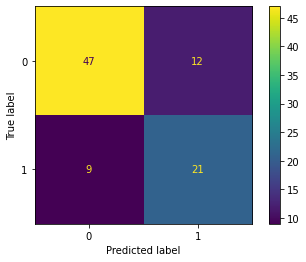

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()

In [ ]:
model = LogisticRegression(penalty='elasticnet', C = 0.1, solver ='saga', max_iter=10000, l1_ratio = 0.2)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.848780487804878

In [ ]:
model.score(X_test, y_test)

0.8314606741573034

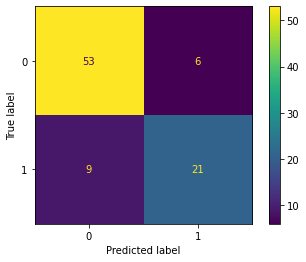

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()

In [ ]:
model = LogisticRegression(penalty='l2', C = 10, solver ='saga', max_iter=100000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8731707317073171

In [ ]:
model.score(X_test, y_test)

0.7640449438202247

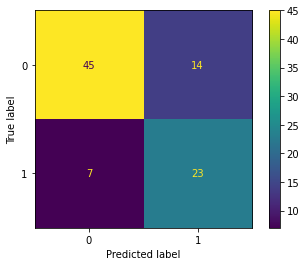

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()

In [ ]:
model = LogisticRegression(penalty='l1', C = 1, solver ='saga', max_iter=10000)
model.fit(X_train, y_train)
model.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


0.8731707317073171

In [ ]:
model.score(X_test, y_test)

0.7752808988764045

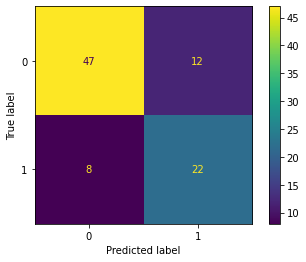

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()

In [ ]:
model = LogisticRegression(penalty='l1', C = 10, solver ='saga', max_iter=10000, l1_ratio = 0.2)
model.fit(X_train, y_train)
model.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


0.8682926829268293

In [ ]:
model.score(X_test, y_test)

0.7640449438202247

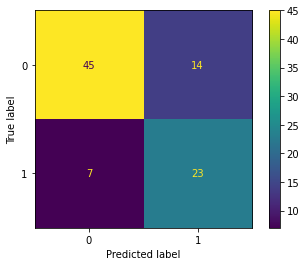

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_)
disp.plot()

## El mejor modelo resulto con los siguiente hiperparámetros:

*   penalty='elasticnet'
*   C = 0.1
*   solver ='saga'
*   max_iter=10000
*   l1_ratio = 0.2

Con una precisión de 0.848780487804878 de entrenamiento 
y con una precisión de 0.8314606741573034 de prueba con datos desconocidos. Como se puede evidenciar este modelo es mejor porque la precisión de prueba no varía mucho a la precisión de entrenamiento, indica que el modelo no tiene muchos fallos a datos desconocidos.

Para mejorar la precisión del modelo se debe usar otros modelos de clasificación.


### Matriz de confusión:

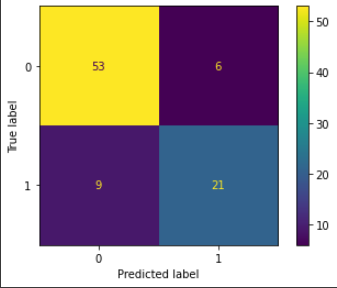

Calculo de la precision del modelo

In [ ]:
from sklearn.metrics import accuracy_score
precision = accuracy_score(y_test, model.predict(X_test))
print('Precisión del modelo: ', precision)

Precisión del modelo:  0.8314606741573034
